In [2]:
# Import Standard Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import ML Libaries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
# Import Dataset from sklearn 
from sklearn.datasets import load_iris

In [3]:
# Load Iris Data
iris = pd.read_csv(r'dataset/Iris.csv')

## Preparing Iris Data

In [9]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [13]:
iris['Species'] = iris['Species'].apply(converter)

In [14]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,virginica
1,2,4.9,3.0,1.4,0.2,virginica
2,3,4.7,3.2,1.3,0.2,virginica
3,4,4.6,3.1,1.5,0.2,virginica
4,5,5.0,3.6,1.4,0.2,virginica
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


## Visualisation of Iris Data

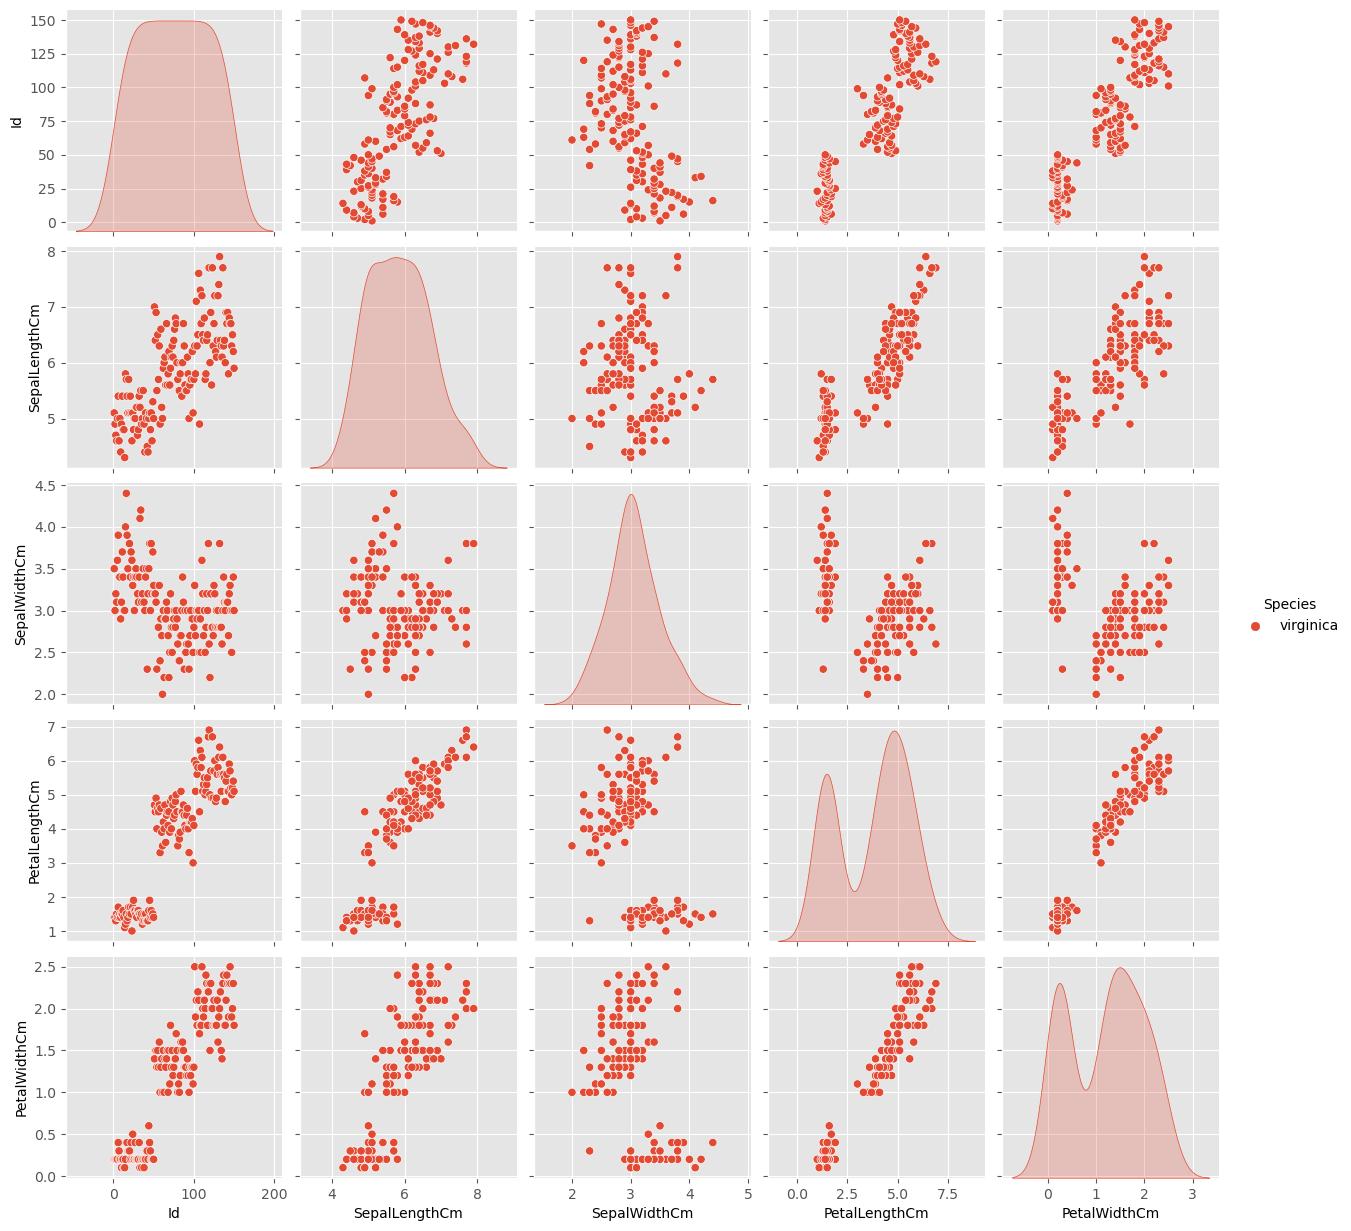

In [16]:
plt.style.use('ggplot')
sns.pairplot(iris, hue= 'Species')

In [166]:
#sns_plot = sns.pairplot(iris_df, hue= 'species')
sns_plot.savefig("snspairplot iris.png")

## Problem: Predict sepal length (cm)

In [17]:
iris.drop('Species', axis= 1, inplace= True)

In [19]:
# Variables 
X= iris.drop(labels= 'SepalLengthCm', axis= 1)
y= iris['SepalLengthCm']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

In [21]:
X_train.shape

(100, 4)

In [22]:
X_test.shape

(50, 4)

In [23]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.predict(X_test)

array([5.48508371, 5.09089138, 4.89512851, 7.04192788, 6.53871592,
       6.02247942, 5.63209747, 5.46190717, 5.87710525, 4.71240875,
       6.29813106, 5.56233328, 4.89557897, 7.34079215, 6.21946738,
       6.0740031 , 5.97388322, 5.97615321, 4.73028901, 6.7484953 ,
       5.4821475 , 5.21292714, 6.00114952, 6.22692563, 6.05204256,
       5.54564204, 5.08496483, 5.85337869, 4.84318173, 4.06243592,
       6.66748   , 5.56140562, 6.6910352 , 5.69150289, 6.49569541,
       6.178897  , 6.37102084, 5.94373446, 5.84419136, 6.80202715,
       5.10593422, 4.78659556, 4.97323396, 6.41043817, 6.16949291,
       4.53680494, 6.81262011, 5.99228598, 4.89106638, 4.91714345])

In [26]:
pred = lr.predict(X_test)

In [27]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.26236275977608614
Mean Squared Error: 0.10440194012073217
Mean Root Squared Error: 0.3231128906755844


## Testing

In [29]:
iris.loc[6]

Id               7.0
SepalLengthCm    4.6
SepalWidthCm     3.4
PetalLengthCm    1.4
PetalWidthCm     0.3
Name: 6, dtype: float64

In [30]:
d = {'SepalLengthCm' : [4.6],
    'SepalWidthCm)' : [3.4],
    'PetalLengthCm' : [1.4],
    'PetalWidthCm' : [0.3],
    'Species' : 0}

In [31]:
test_df = pd.DataFrame(data= d)

In [32]:
test_df

,SepalLengthCm,SepalWidthCm),PetalLengthCm,PetalWidthCm,Species
0,4.6,3.4,1.4,0.3,0


In [34]:
X_test = test_df.drop('SepalLengthCm', axis= 1)
y_test = test_df['SepalLengthCm']

In [191]:
lr.predict(X_test)

array([4.88749921])

In [192]:
pred = lr.predict(X_test)

In [195]:
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 4.88749921150266
Actual Sepal Length (cm): 4.6


## END